In [40]:
!pip install keras
!pip install tensorflow

   ---------------------------------------- 0.0/385.0 MB ? eta -:--:--
   ---------------------------------------- 2.5/385.0 MB 80.9 MB/s eta 0:00:05
    --------------------------------------- 7.4/385.0 MB 119.7 MB/s eta 0:00:04
   - ------------------------------------- 14.8/385.0 MB 131.2 MB/s eta 0:00:03
   -- ------------------------------------ 22.8/385.0 MB 162.4 MB/s eta 0:00:03
   --- ----------------------------------- 30.5/385.0 MB 162.4 MB/s eta 0:00:03
   --- ----------------------------------- 34.9/385.0 MB 131.2 MB/s eta 0:00:03
   --- ----------------------------------- 38.9/385.0 MB 108.8 MB/s eta 0:00:04
   ---- ----------------------------------- 43.7/385.0 MB 93.0 MB/s eta 0:00:04
   ---- ----------------------------------- 47.9/385.0 MB 93.0 MB/s eta 0:00:04
   ----- ---------------------------------- 52.1/385.0 MB 81.8 MB/s eta 0:00:05
   ----- ---------------------------------- 55.7/385.0 MB 81.8 MB/s eta 0:00:05
   ------ --------------------------------- 58.7/3

In [35]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.7/124.9 MB 11.5 MB/s eta 0:00:11
    --------------------------------------- 2.5/124.9 MB 22.2 MB/s eta 0:00:06
   - -------------------------------------- 4.4/124.9 MB 27.8 MB/s eta 0:00:05
   -- ------------------------------------- 6.3/124.9 MB 30.9 MB/s eta 0:00:04
   -- ------------------------------------- 8.3/124.9 MB 33.2 MB/s eta 0:00:04
   --- ------------------------------------ 10.3/124.9 MB 38.6 MB/s eta 0:00:03
   --- ------------------------------------ 12.4/124.9 MB 40.9 MB/s eta 0:00:03
   ---- ----------------------------------- 14.5/124.9 MB 43.7 MB/s eta 0:00:03
   ----- ---------------------------------- 16.6/124.9 MB 43.7 MB/s eta 0:00:03
   ------ --------------------------------- 18.9/124.9 MB 43.5 MB/s eta 0:00:03
   ------ --------------------------------- 21.0/124.9 MB 46.7 

In [24]:
!pip install yfinance
!pip install statsmodels

In [26]:
import yfinance as yf
import pandas as pd

# Download NVIDIA stock price data
ticker = 'NVDA'
data = yf.download(ticker, start='2020-01-01', end='2024-07-24')
data.reset_index(inplace=True)
data.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,5.96875,5.99775,5.91800,5.99775,5.973634,237536000
1,2020-01-03,5.87750,5.94575,5.85250,5.90175,5.878019,205384000
2,2020-01-06,5.80800,5.93175,5.78175,5.92650,5.902669,262636000
3,2020-01-07,5.95500,6.04425,5.90975,5.99825,5.974132,314856000
4,2020-01-08,5.99400,6.05100,5.95375,6.00950,5.985336,277108000


## Data Preprocessing

In [28]:
# Check if 'Date' column exists
if 'Date' not in data.columns:
    print("Date column is missing. Check the data download step.")
else:
    # Ensure 'Date' column is of datetime type
    data['Date'] = pd.to_datetime(data['Date'])

# Check for missing values
print(data.isna().sum())

# Fill missing values (if any)
data.fillna(method='ffill', inplace=True)

# Feature engineering: Adding Moving Averages
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()
data.dropna(inplace=True)


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


C:\Users\risingh\AppData\Local\Temp\ipykernel_24988\1204298374.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


## Exploratory Data Analysis (EDA)

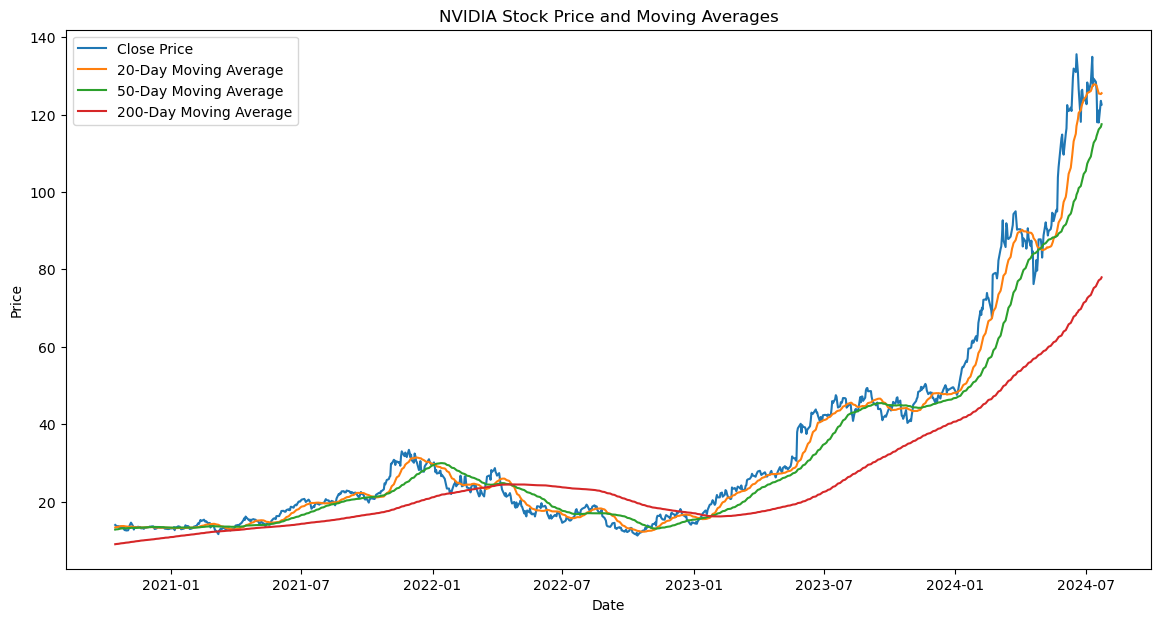

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.plot(data['Date'], data['MA20'], label='20-Day Moving Average')
plt.plot(data['Date'], data['MA50'], label='50-Day Moving Average')
plt.plot(data['Date'], data['MA200'], label='200-Day Moving Average')
plt.title('NVIDIA Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [20]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA20,MA50,MA200
199,2020-10-15,13.81075,14.00575,13.76775,13.97000,13.932670,267224000,13.332087,12.766890,8.988364
200,2020-10-16,14.03675,14.12150,13.79250,13.81150,13.774593,242392000,13.413200,12.816410,9.027432
201,2020-10-19,13.90300,13.98350,13.40675,13.49775,13.461684,298068000,13.462225,12.862375,9.065412
202,2020-10-20,13.58350,13.79975,13.50700,13.64550,13.609036,229212000,13.512612,12.911985,9.104007
203,2020-10-21,13.62500,13.79150,13.47750,13.52475,13.488609,219596000,13.582662,12.965480,9.141640


## Modeling

Date column is missing after preprocessing. Check the steps.
RMSE: 47.05097196213772
Percentage RMSE: 59.07%


C:\Users\risingh\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\risingh\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\risingh\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\risingh\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer

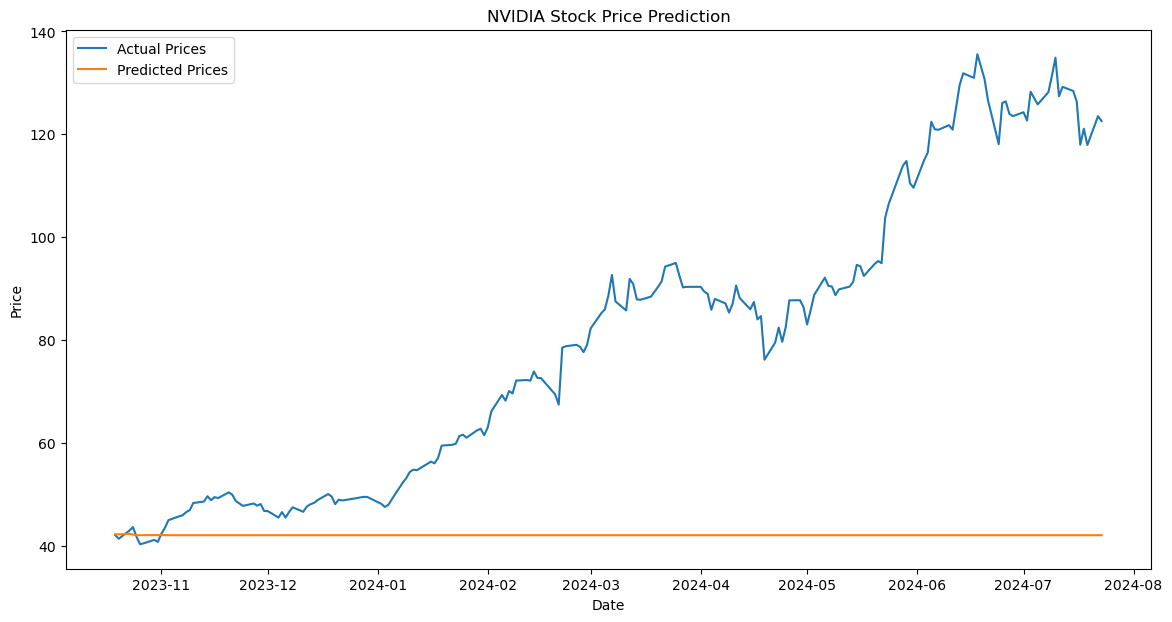

In [32]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Ensure 'Date' column exists before setting it as index
if 'Date' in data.columns:
    data.set_index('Date', inplace=True)
else:
    print("Date column is missing after preprocessing. Check the steps.")

# Check if data is not empty
if data.empty:
    print("Data is empty. Check previous steps for data issues.")
else:
    # Train-test split
    train = data['Close'][:int(0.8*len(data))]
    test = data['Close'][int(0.8*len(data)):]

    # ARIMA Model
    model = ARIMA(train, order=(5,1,0))
    model_fit = model.fit()
    predictions = model_fit.forecast(steps=len(test))

    # Evaluate the model
    rmse = np.sqrt(mean_squared_error(test, predictions))
    print(f'RMSE: {rmse}')
    mean_actual = test.mean()  # Calculate the mean of the actual stock prices
    percentage_rmse = (rmse / mean_actual) * 100
    print(f"Percentage RMSE: {percentage_rmse:.2f}%")

    plt.figure(figsize=(14, 7))
    plt.plot(test.index, test, label='Actual Prices')
    plt.plot(test.index, predictions, label='Predicted Prices')
    plt.title('NVIDIA Stock Price Prediction')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

Date column is missing after preprocessing. Check the steps.


C:\Users\risingh\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\risingh\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE: 43.07651835110826
Percentage RMSE: 54.08%


C:\Users\risingh\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\risingh\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


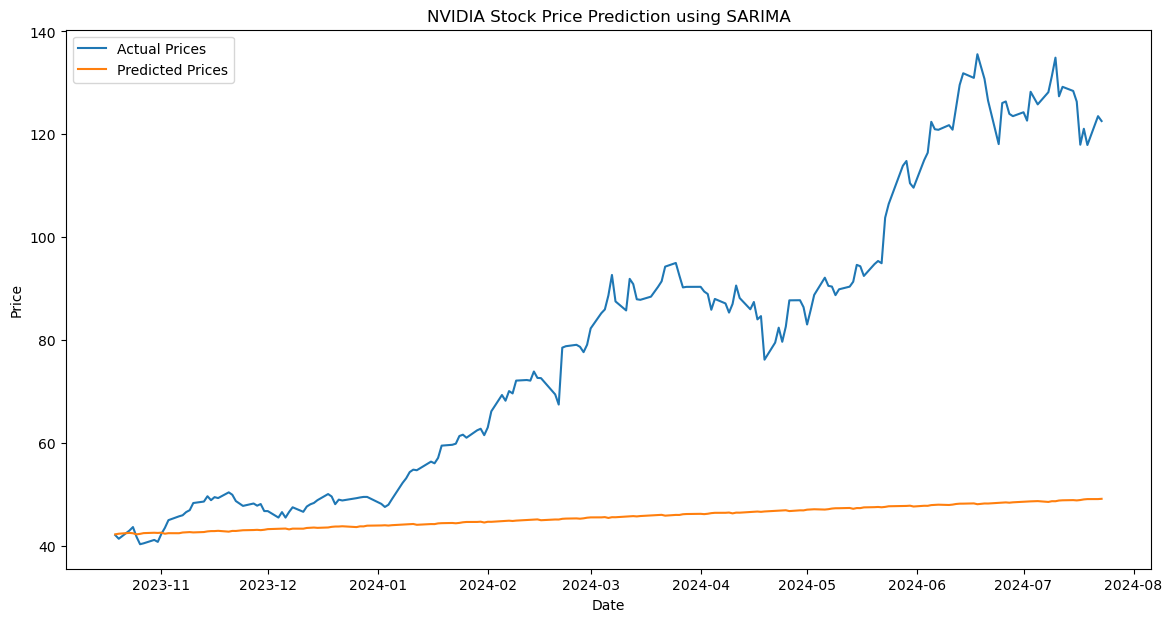

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ensure 'Date' column exists before setting it as index
if 'Date' in data.columns:
    data.set_index('Date', inplace=True)
else:
    print("Date column is missing after preprocessing. Check the steps.")

# Check if data is not empty
if data.empty:
    print("Data is empty. Check previous steps for data issues.")
else:
    # Train-test split
    train = data['Close'][:int(0.8*len(data))]
    test = data['Close'][int(0.8*len(data)):]

    # SARIMA Model
    model = SARIMAX(train, order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))  # Adjust seasonal_order as needed
    model_fit = model.fit(disp=False)
    predictions = model_fit.forecast(steps=len(test))

    # Evaluate the model
    rmse = np.sqrt(mean_squared_error(test, predictions))
    print(f'RMSE: {rmse}')
    mean_actual = test.mean()  # Calculate the mean of the actual stock prices
    percentage_rmse = (rmse / mean_actual) * 100
    print(f"Percentage RMSE: {percentage_rmse:.2f}%")

    plt.figure(figsize=(14, 7))
    plt.plot(test.index, test, label='Actual Prices')
    plt.plot(test.index, predictions, label='Predicted Prices')
    plt.title('NVIDIA Stock Price Prediction using SARIMA')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

RMSE: 41.88897832764269
Percentage RMSE: 52.45%


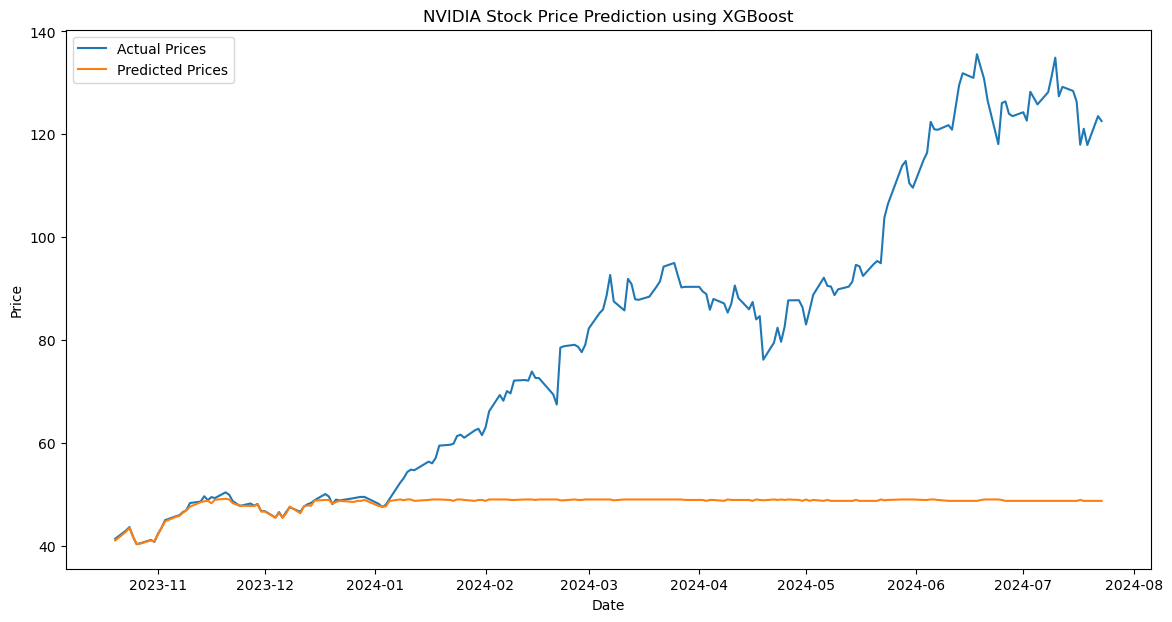

In [36]:
import xgboost as xgb

# Prepare the data for XGBoost
def prepare_data(data):
    # Create lag features
    for i in range(1, 6):  # Create 5 lag features
        data[f'lag_{i}'] = data['Close'].shift(i)

    data.dropna(inplace=True)  # Drop rows with NaN values
    return data

# Prepare the data
data_prepared = prepare_data(data.copy())
X = data_prepared.drop('Close', axis=1)
y = data_prepared['Close']

# Train-test split
X_train, X_test = X[:int(0.8*len(X))], X[int(0.8*len(X)):]
y_train, y_test = y[:int(0.8*len(y))], y[int(0.8*len(y)):]

# XGBoost Model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.01)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'RMSE: {rmse}')
mean_actual = y_test.mean()  # Calculate the mean of the actual stock prices
percentage_rmse = (rmse / mean_actual) * 100
print(f"Percentage RMSE: {percentage_rmse:.2f}%")

plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Prices')
plt.plot(y_test.index, predictions, label='Predicted Prices')
plt.title('NVIDIA Stock Price Prediction using XGBoost')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Epoch 1/100


C:\Users\risingh\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0113
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0021
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9919e-04
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4433e-04
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6342e-04
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2582e-04
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3437e-04
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4961e-04
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1828e-04
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2345e-04
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4588e-04
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2351e-04
Epoch 13/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7189e-04
Epoch 14/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8796e-04
Epoch 15/100
24/24 ━━━━━━━━━━━━━━━━

ValueError: x and y must have same first dimension, but have shapes (190,) and (189, 1)

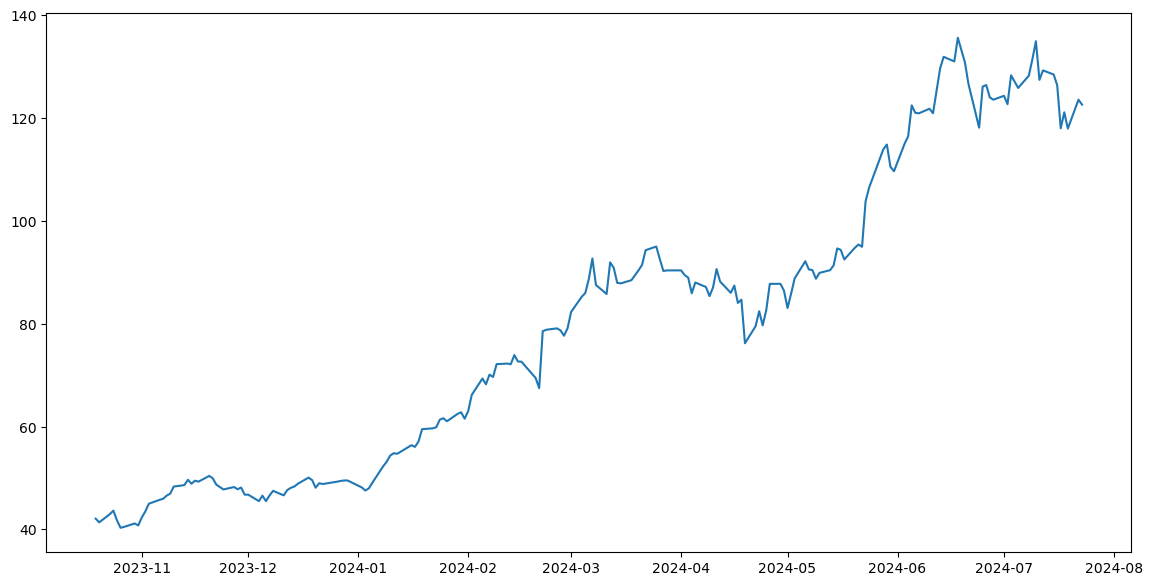

In [41]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Prepare the data for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Time step for LSTM
time_step = 5
X, y = create_dataset(scaled_data, time_step)

# Reshape input to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Train-test split
X_train, X_test = X[:int(0.8*len(X))], X[int(0.8*len(X)):]
y_train, y_test = y[:int(0.8*len(y))], y[int(0.8*len(y)):]

# LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'RMSE: {rmse}')
mean_actual = np.mean(y_test)  # Calculate the mean of the actual stock prices
percentage_rmse = (rmse / mean_actual) * 100
print(f"Percentage RMSE: {percentage_rmse:.2f}%")

plt.figure(figsize=(14, 7))
plt.plot(data.index[int(0.8*len(data)):], data['Close'][int(0.8*len(data)):], label='Actual Prices')
plt.plot(data.index[int(0.8*len(data)):], predictions, label='Predicted Prices')
plt.title('NVIDIA Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
